In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.formula.api as sm

%matplotlib inline


In [24]:
df = pd.read_csv("bus_data/Dcc/siri.20121109.csv", low_memory=False, header=None)
df.columns = ["Timestamp", "LineID", "Direction", "JourneyPatternID", "TimeFrame", 
              "VehicleJourneyID", "Operator", "Congestion", "Lon", "Lat", 
              "Delay", "BlockID", "VehicleID", "StopID", "AtStop"]


In [25]:
df.shape


(1758304, 15)

In [26]:
df.dtypes

Timestamp             int64
LineID               object
Direction             int64
JourneyPatternID     object
TimeFrame            object
VehicleJourneyID      int64
Operator             object
Congestion            int64
Lon                 float64
Lat                 float64
Delay                 int64
BlockID               int64
VehicleID             int64
StopID               object
AtStop                int64
dtype: object

In [27]:

df.head(10)

,Timestamp,LineID,Direction,JourneyPatternID,TimeFrame,VehicleJourneyID,Operator,Congestion,Lon,Lat,Delay,BlockID,VehicleID,StopID,AtStop
0,1352419200000000,66,0,00260001,2012-11-08,2927,PO,0,-6.274583,53.353851,-185,66002,33595,2210,1
1,1352419200000000,56,0,056A0001,2012-11-08,2078,RD,0,-6.376367,53.304451,-887,56002,33015,7177,0
2,1352419200000000,27,0,00270001,2012-11-08,4976,RD,0,-6.249583,53.343666,0,27011,33319,2355,1
3,1352419200000000,747,0,07470001,2012-11-08,4262,SL,0,-6.241633,53.391617,-100,747006,40037,7492,1
4,1352419200000000,40,0,040D0001,2012-11-08,2460,HN,0,-6.390658,53.419765,-389,40203,33213,7102,0
5,1352419200000000,140,0,null,2012-11-08,6225,HN,0,-6.266963,53.371498,-4,140013,33546,274,0
6,1352419200000000,25,0,00250001,2012-11-08,713,CD,0,-6.459133,53.355335,-184,25014,33289,3890,1
7,1352419200000000,65,0,065B0001,2012-11-08,4018,RD,0,-6.308684,53.296303,415,65005,38008,1130,0
8,1352419202000000,16,0,00160001,2012-11-08,5607,SL,0,-6.283512,53.304127,415,16015,33119,1300,0
9,1352419202000000,145,0,01451002,2012-11-08,6815,D2,0,-6.231067,53.325218,-460,145101,36021,794,0


In [28]:
#Select all columns of type 'object'
object_columns = df.select_dtypes(['object']).columns


In [29]:
#Convert selected columns to type 'category'
for column in object_columns:
    df[column] = df[column].astype('category')   

In [30]:
# Convert some features to categorical
for column in ['LineID', 'VehicleJourneyID', 'Congestion', 'BlockID', 'VehicleID', 'AtStop']:
    df[column] = df[column].astype('category')

In [31]:
# Convert Unix timestamp to datetime

# Take uneccesary trailing zeroes off of unix timestamp. 
df['Timestamp'] = df['Timestamp'].apply(lambda x: x//1000000)

# Convert the timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')



In [32]:
# Add day of week column
df['Day'] = df['Timestamp'].dt.dayofweek

In [33]:
# Add hour of day column
df['Hour'] = df['Timestamp'].dt.hour

In [34]:
# Descriptive stats for categorical features
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
LineID,1748973,77,15,103358
JourneyPatternID,1757835,444,null,261157
TimeFrame,1758304,2,2012-11-09,1748233
VehicleJourneyID,1758304,7523,1261,1027
Operator,1758304,8,HN,317321
Congestion,1758304,2,0,1740810
BlockID,1758304,936,145003,3590
VehicleID,1758304,845,33252,3394
StopID,1758304,4726,null,102260
AtStop,1758304,2,0,1396530


In [35]:
# Descriptive stats for continuous features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Direction,1758304.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
Lon,1758304.0,-6.271178,0.081380,-6.690017,-6.305431,-6.261227,-6.23355,-6.053017
Lat,1758304.0,53.344467,0.054321,53.070400,53.320400,53.346069,53.37175,53.606548
Delay,1758304.0,167.827890,565.406674,-8958.000000,-44.000000,38.000000,336.00000,15188.000000
Day,1758304.0,4.000000,0.000000,4.000000,4.000000,4.000000,4.00000,4.000000
Hour,1758304.0,13.729223,4.892096,0.000000,9.000000,14.000000,18.00000,23.000000


In [36]:
vehicledf = df[(df.VehicleID == 33210) & (df.AtStop == 1) & (df.TimeFrame == "2012-11-07")]
# vehicledf = vehicledf.drop_duplicates('StopID')

In [37]:
vehicledf

,Timestamp,LineID,Direction,JourneyPatternID,TimeFrame,VehicleJourneyID,Operator,Congestion,Lon,Lat,Delay,BlockID,VehicleID,StopID,AtStop,Day,Hour


In [38]:
df15 = df[(df.JourneyPatternID == '00150001')]

In [39]:
stops = df.drop_duplicates('StopID')
stops = stops['StopID']
stops = stops.reset_index(drop='True')

In [41]:
stops.shape

(4726,)

In [42]:
stopdict = {}
for stop in stops:
    row = df[df.StopID == stop].iloc[0]
    stopdict[stop] = [row["Lon"], row["Lat"]]

In [43]:
stopdict

{'2210': [-6.2745829999999998, 53.353850999999999],
 '7177': [-6.3763670000000001, 53.304451],
 '2355': [-6.2495830000000003, 53.343666000000006],
 '7492': [-6.2416330000000002, 53.391617000000004],
 '7102': [-6.3906580000000002, 53.419765000000005],
 '274': [-6.2669629999999996, 53.371497999999995],
 '3890': [-6.4591330000000005, 53.355334999999997],
 '1130': [-6.3086839999999995, 53.296303000000002],
 '1300': [-6.283512, 53.304127000000001],
 '794': [-6.2310669999999995, 53.325218000000007],
 '2415': [-6.3135669999999999, 53.315075],
 '3328': [-6.4422649999999999, 53.410556999999997],
 '1989': [-6.3167999999999997, 53.343032999999998],
 '5114': [-6.4998959999999997, 53.357830000000007],
 '7186': [-6.4660900000000003, 53.357089999999999],
 '1995': [-6.2887420000000001, 53.343456000000003],
 '1479': [-6.2661009999999999, 53.346187999999998],
 '1251': [-6.221768, 53.393017000000007],
 '7047': [-6.4390309999999999, 53.392166000000003],
 '3129': [-6.1474489999999999, 53.260616000000006],


In [14]:
df["Congestion"] = df[column].astype('int64')

In [15]:
continuous_features = ["Timestamp", "LonWGS84", "LatWGS84", "Delay", "Congestion"]

(array([ 0.5,  1.5,  2.5,  3.5]), <a list of 4 Text xticklabel objects>)

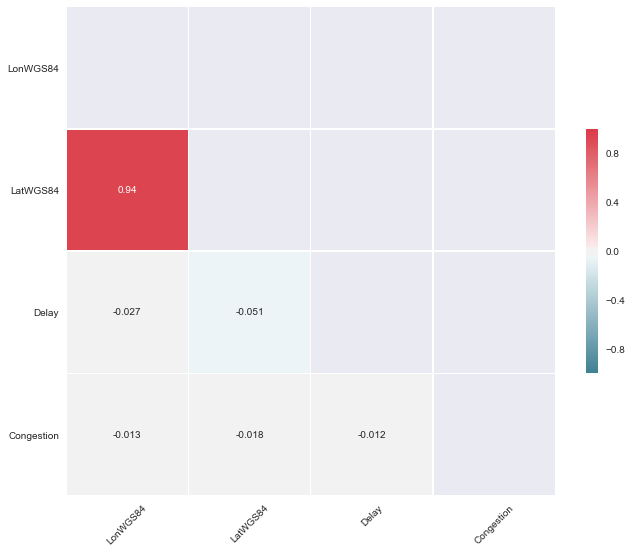

In [16]:
# Calculate correlation of all pairs of continuous features
corr = df[continuous_features].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

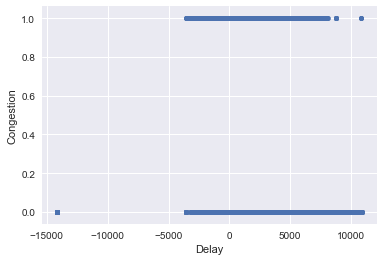

In [19]:
df.plot(kind='scatter', x='Delay', y='Congestion')
# plt.savefig("images/congestion_delay_scatter.png")

In [20]:
categorical_columns = ["LineID", "JourneyPatternID", "TimeFrame", "VehicleJourneyID", 
                       "Operator", "Congestion", "BlockID", "VehicleID", "StopID", "AtStop"]
# for col in categorical_columns:
#     df[col].value_counts().plot(kind='bar')

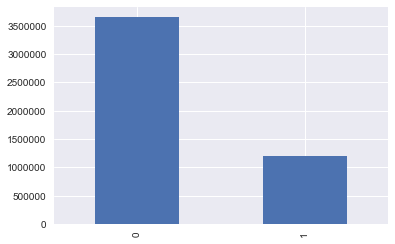

In [21]:
df['Congestion'].value_counts().plot(kind='bar')
# plt.savefig("images/congestion_bar.png")

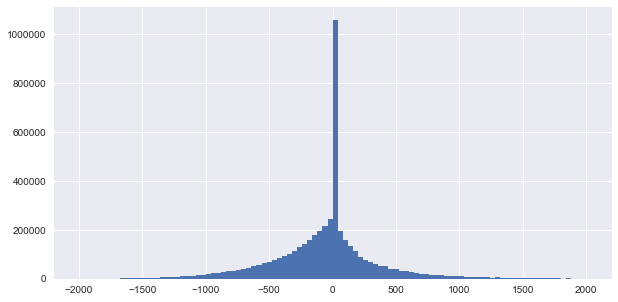

In [22]:
df["Delay"].hist(figsize=(10, 5), bins=100, range=[-2000, 2000])
# plt.savefig('images/delay_hist.png')

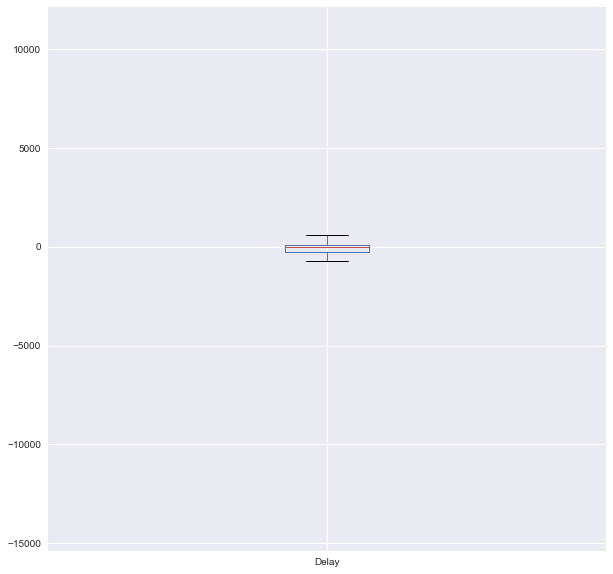

In [23]:
plt.figure(figsize=(10, 10))
df["Delay"].plot(kind='box')

In [24]:
def stacked_plot(clean_df, f1, f2):
    # Compare f2 and f1

    # Find unique values in f2
    featured = pd.unique(clean_df[f2].ravel())

    # Insert a new column called 'percent' and fill it with 0s
    clean_df['percent'] = 0

    # Iterate through the unique values in f2 and for each value count the amount of f1
    # Find the indexes of each row with a particular value and for each of these row insert count * 100 in the percent column
    for c in featured:
        count = 1 / clean_df[clean_df[f2] == c].count()[f1]
        index_list = clean_df[clean_df[f2] == c].index.tolist()
        for i in index_list:
            clean_df.loc[i, 'percent'] = count * 100

    # Group dataframe by ShipsFromCountry and IsWinner and sum percent
    group = clean_df[['percent',f2,f1]].groupby([f2,f1]).sum()
    
    # Plot values of group in a stacked bar chart
    my_plot = group.unstack().plot(kind='bar', stacked=True, title=f1 + " by " +  f2, figsize=(15,7))

    # Define label colours and text and add to the plot
    red_patch = mpatches.Patch(color='green', label=f1)
    blue_patch = mpatches.Patch(color='blue', label="Not " + f1)
    my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

    # Define x and y labels and min and max values for the y axis
    my_plot.set_xlabel(f2)
    my_plot.set_ylabel("% " + f1)
    my_plot.set_ylim([0,100])

In [25]:
# Group by day of week and hour of day, get mean 
# hd_delay = df.groupby([df["Timestamp"].dt.dayofweek, df["Timestamp"].dt.hour])["Delay"].mean()


In [26]:
groups = df.groupby([df["Timestamp"].dt.dayofweek, df["Timestamp"].dt.hour])["Delay"].mean()

In [27]:
type(groups)

pandas.core.series.Series

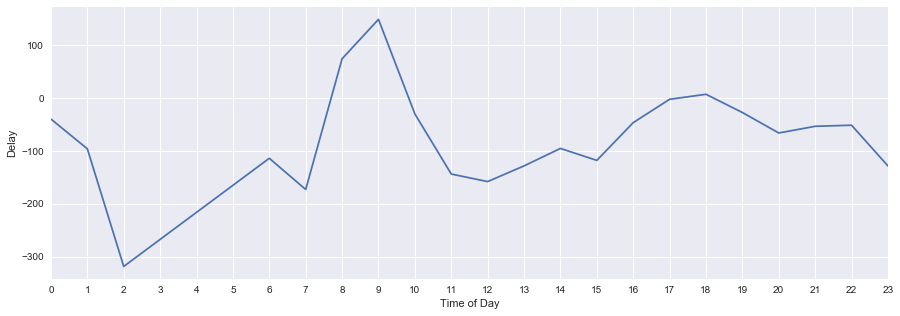

In [28]:
hourly_delay = df.groupby(['Hour'])["Delay"].mean().plot(figsize=(15,5))

hourly_delay.set(xlabel="Time of Day", ylabel="Delay")
hourly_delay.set_xticks([x for x in range(24)])
hourly_delay.set_xticklabels([x for x in range(24)])

[<matplotlib.text.Text at 0x1163551d0>, <matplotlib.text.Text at 0x116306400>]

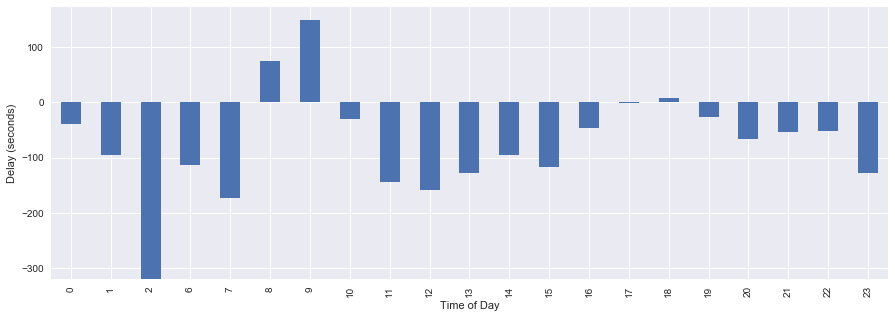

In [29]:
hourly_delay = df.groupby(['Hour'])["Delay"].mean().plot(figsize=(15,5), kind='bar')

hourly_delay.set(xlabel="Time of Day", ylabel="Delay (seconds)")

# plt.savefig("hourly_delay_bar.png")

In [30]:
days = df.groupby(["Day"])


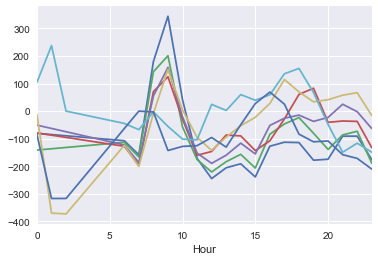

In [31]:
for name, day in days:
    
    hours = day.groupby(["Hour"])["Delay"].mean().plot()
#     hours["Delay"].mean().hist()

In [32]:
df.groupby["Hour"]

TypeError: 'method' object is not subscriptable

In [ ]:
groups.hist(figsize=(10, 5))


In [ ]:
for group in hd_delay:
    print(group)
    print()